In [1709]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [1810]:
def init_population(size, length, p=None):
    if p is None:
        return np.random.randint(low=0, high=2, size=(size, length))
    return np.random.choice([0, 1], p=p, size=(size, length))

In [1811]:
def crossover_one_point(p1: np.ndarray, p2: np.ndarray, point: int):
    return np.hstack([p1[:point], p2[point:]])

In [1812]:
def fitness(pop):
    return np.sum(pop, axis=1)

In [1813]:
def best_split(p1, p2):
    r = map(lambda _: (fitness(crossover_one_point(p1, p2, _).reshape(1, -1)), _), np.arange(len(p1)))
    return sorted(r, key=lambda x: x[0], reverse=True)[0]

In [1814]:
def split(p1, p2):
    _, point = best_split(p1, p2)
    return crossover_one_point(p1, p2, point)

In [1815]:
def crossover(population):
    # Sort the binary genome from high to low
    sorted_genomes = np.sort(population[:], axis=1)[:, ::-1]
    
    # Compute the cumulative sum, representing the fitness of the genome
    cumulative_fitness = np.cumsum(sorted_genomes, axis=1)
    
    # Retrieve the index of the last occurrence before 0
    argmax_index = np.argmax(cumulative_fitness, axis=1)
    
    # Select the dominant parent with the highest fitness
    dominant_parent_index = np.argmax(argmax_index)
    non_dominant_parent_index = (dominant_parent_index + 1) % 2
    
    # Determine the split point based on the dominant parent's fitness
    split_point = argmax_index[dominant_parent_index] + 1
    
    # Keep all favorable genomes in the dominant parent and fill the remainder with favorable genomes from the non-dominant parent
    upper_section = sorted_genomes[non_dominant_parent_index][::-1][split_point:]
    lower_section = sorted_genomes[dominant_parent_index][:split_point]
    
    # Concatenate the upper and lower sections to form the offspring
    offspring = np.hstack([lower_section, upper_section])
    return offspring

In [1905]:
class GA:
    
    def __init__(self, mutation_rate=0.5, generations=100):
        self.mr = mutation_rate
        self.gn = generations
    
    def fit(self, pop):
        for _ in range(self.gn):
            child = crossover(pop)
            idx = np.random.randint(0, len(child))
            if np.random.rand() < self.mr:
                child[idx] =  1 - child[idx]
            scores = fitness(pop)
            pop = pop[np.arange(len(pop)) != np.argmin(scores)]
            pop = np.vstack([pop, child])
            #print(np.max(scores))
            if np.max(scores) == pop.shape[-1]:
                break
                
        return _ + 1, pop[np.argmax(scores)].sum()/child.shape[-1]

f = lambda : GA(generations=100).fit(np.vstack([init_population(size=4, length=5, p=(.7, .3)), np.zeros(shape=(1000, 5))]))
x, y = list(zip(*[f() for _ in range(5000)]))

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [2134]:
import pandas as pd

In [2196]:
np.random.seed(0)
pop_size, string_length = np.arange(10, 25 + 1, 1), np.arange(50, 1001, 50)
z1 = np.zeros(shape=(len(pop_size), len(string_length)))
z2 = np.zeros(shape=(len(pop_size), len(string_length)))
z3 = np.zeros(shape=(len(pop_size), len(string_length)))
p = .05
data = []
for x, s in tqdm(enumerate(pop_size), total=len(pop_size)):
    for y,  l in enumerate(string_length):
        avg = []
        for i in range(200):
            r = GA(generations=1000).fit(np.vstack([np.random.binomial(1, p, size=(s, l))]))
            data.append([s, l, *r])
            avg.append(r[0])
        z1[x, y] = np.mean(avg)
        z2[x, y] = r[0]
        z3[x, y] = r[1]


  0%|          | 0/16 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Average number of iterations')

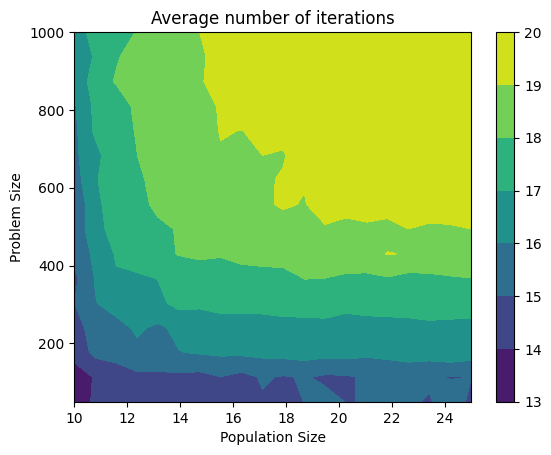

In [2205]:
df = pd.DataFrame(data, columns=['size', 'length', 'i', 's'])
extent = (min(pop_size), max(pop_size), min(string_length), max(string_length))
f = plt.contourf(z1, extent=extent, levels=np.arange(13, max(z1.flatten())), cmap='viridis')
plt.colorbar(f)
plt.xlabel('Population Size')
plt.ylabel('Problem Size')
plt.title('Average number of iterations')

Text(0.5, 1.0, 'Number of iterations')

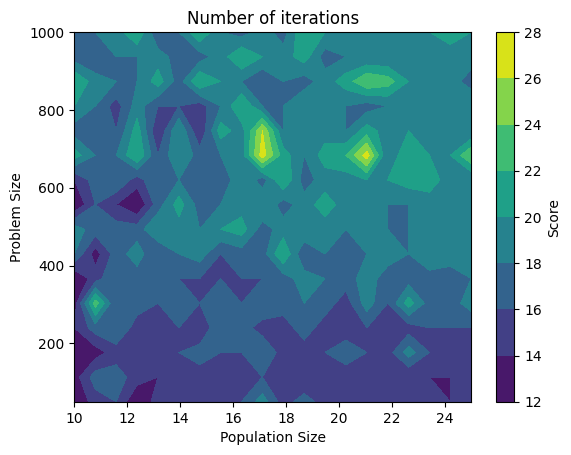

In [2208]:
extent = (min(pop_size), max(pop_size), min(string_length), max(string_length))
f = plt.contourf(z2, extent=extent)
plt.colorbar(f, label='Score')
plt.xlabel('Population Size')
plt.ylabel('Problem Size')
plt.title('Number of iterations')

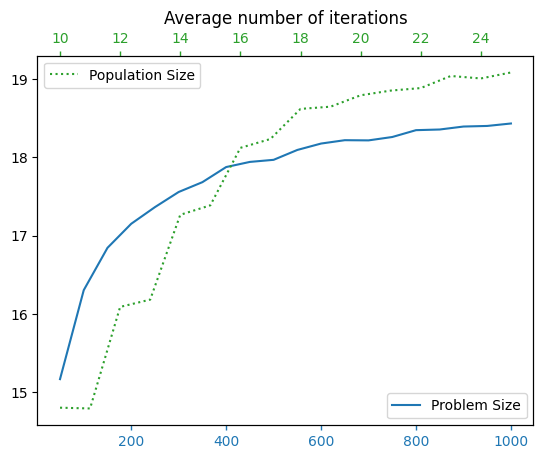

In [2209]:
t = df.groupby('length').mean()
x, y = t.index, t.i
plt.plot(x, y, label='Problem Size', color='tab:blue')
plt.legend(loc='lower right')
plt.tick_params(color='tab:blue', width=1, labelcolor='tab:blue', axis='x')
t = df.groupby('size').mean()
x, y = t.index, t.i
ax = plt.twiny()
ax.tick_params(color='tab:green', width=1, labelcolor='tab:green')
ax.plot(x, y, label='Population Size', color='tab:green', linestyle=':')
plt.title('Average number of iterations')
plt.legend()

In [1701]:
pop = init_population(10, 100000)

In [1702]:
print(np.max(fitness(pop)))

50120


In [1704]:
#np.random.seed(3)
rpop = pop[:, ::-1]
#np.argmax(np.cumsum(prop, axis=1), axis=1)

# We first sort the binary genome from high to low
s = np.sort(pop[:], axis=1)[:, ::-1]
# We then compute the cumulative sum, this is the fitness of the genome
c = np.cumsum(s, axis=1)
# We then retrieve the argmax, this is the last index, before the value 0 occurs
a = np.argmax(c, axis=1)
# We then select the dominant parent, which is the genome with the highest fitness
dominant_parent = np.argmax(a)
non_dominant_parent = (dominant_parent + 1) % 2
# We then keep all the favorable genomes in the dominant parent, and disregard the rest, and fill the remainder with the favorable genomes from the non dominant parent
split = a[dominant_parent] + 1
u = s[non_dominant_parent][::-1][split:]
l = s[dominant_parent][:split]
child = np.hstack([l,u])
pop = pop[np.arange(len(pop)) != np.argmin(fitness(pop))]
pop = np.vstack([pop, child])
print(pop.shape)
print(dominant_parent)
print(pop.shape)
print(np.mean(fitness(pop)))
print(np.max(fitness(pop)))

(10, 100000)
9
(10, 100000)
59993.2
100000


0

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (4174980591.py, line 6)

array([[0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0]])